# **EDA COD TRENDS**

## Objectives

* Explore seasonal trends and patterns in Chemical Oxygen Demand (COD) data
* Identify how COD levels vary across months and seasons to support regulatory and process improvements.
* Investigate the relationship between COD and treatment condition variables.

## Inputs

* outputs/datasets/collection/data-melborne_f.csv

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* This notebook supports Business Requirement 1: understanding how COD fluctuates seasonally.
* Focus here is on descriptive EDA so no ML models included.
* Can be reviewed with stakeholders for feedback


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Nod-to-the-COD/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Nod-to-the-COD'

# Import Libraries and Load Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [8]:
# Replace 'your_data.csv' with your actual file path or filename
df = pd.read_csv(f"outputs/datasets/collection/Data-Melbourns_F_fixed.csv", parse_dates=['date'])

# Quick preview
df.head()


,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,date
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014-01-01
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014-01-02
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014-01-05
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014-01-06
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014-01-07


## Seasonal Analysis of COD

Although I had got rid of day, month and year colums, I realise now I need to add these back in for my seasonal analysis. Also I want to create the seasonal data.

In [9]:
# Create new time-related columns
df['Month'] = df['date'].dt.month
df['Month_Name'] = df['date'].dt.strftime('%b')
df['Season'] = df['date'].dt.month % 12 // 3 + 1
df['Season'] = df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

# Sort month names for plots
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

### Boxplot - Monthly Distribution of COD
This boxplot shows the distribution of COD values across the year to help identify any seasonal fluctuations.

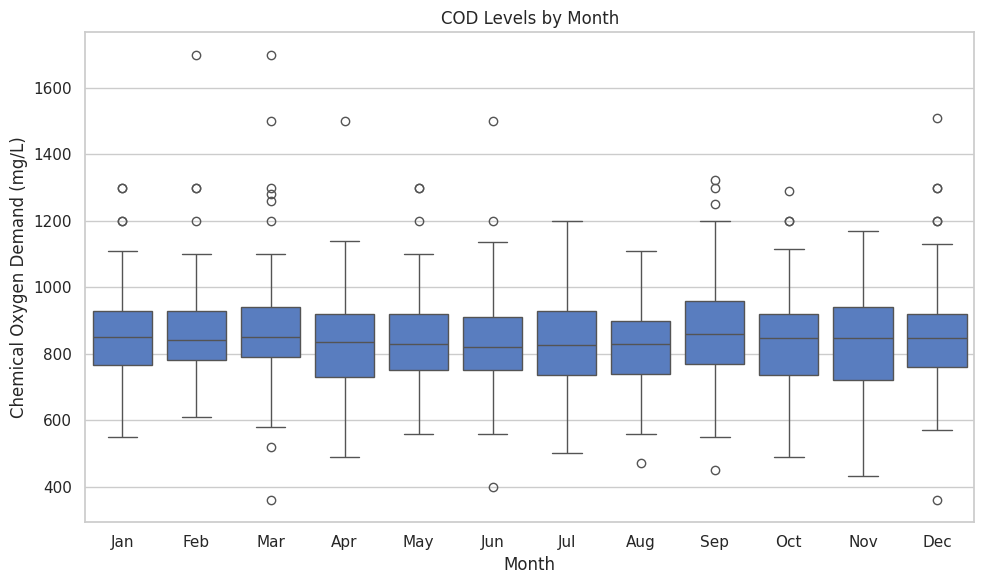

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month_Name', y='Chemical Oxygen Demand', data=df, order=month_order)
plt.title('COD Levels by Month')
plt.ylabel('Chemical Oxygen Demand (mg/L)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


##### Observation - There is little variability in COD levels across the year, though there is a small dip during the summer months, between June and August.

Now I will plot a box plot to show the seasonal distribution of COD>

### Box Plot - Seasonal Distribution of COD

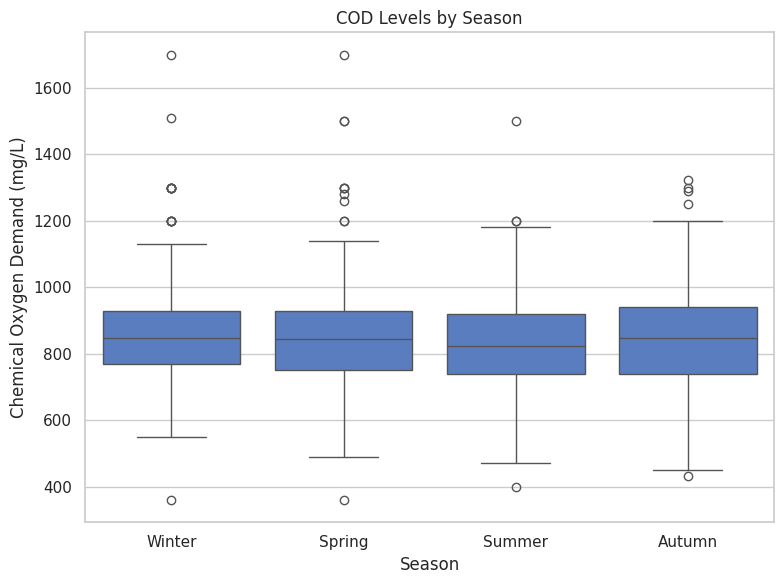

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Season', y='Chemical Oxygen Demand', data=df)
plt.title('COD Levels by Season')
plt.ylabel('Chemical Oxygen Demand (mg/L)')
plt.xlabel('Season')
plt.tight_layout()
plt.show()


##### Observation - As previously, we can see there is a small dip during the summer. There is very little variability between the other months.

This could indicate a good working process for the treament plant over the year as the levels are so consistant.

As the above analysis shows little variation, we can look at line plots as these can make the subtle trends look clearer.

### Trend Line plot - Monthly Averages of COD

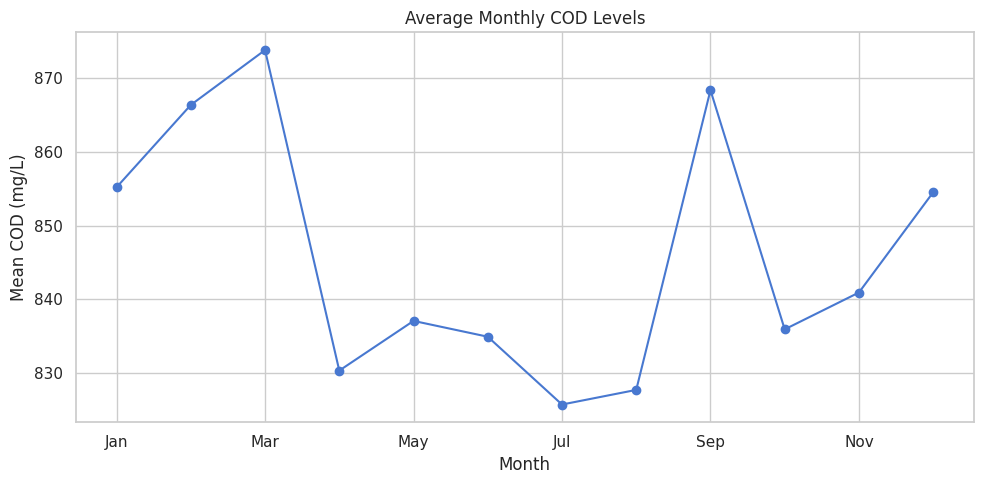

In [12]:
monthly_avg = df.groupby('Month_Name')['Chemical Oxygen Demand'].mean().reindex(month_order)

plt.figure(figsize=(10, 5))
monthly_avg.plot(marker='o')
plt.title('Average Monthly COD Levels')
plt.ylabel('Mean COD (mg/L)')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


### Trend Line Plot - Year-on-Year Seasonal COD levels

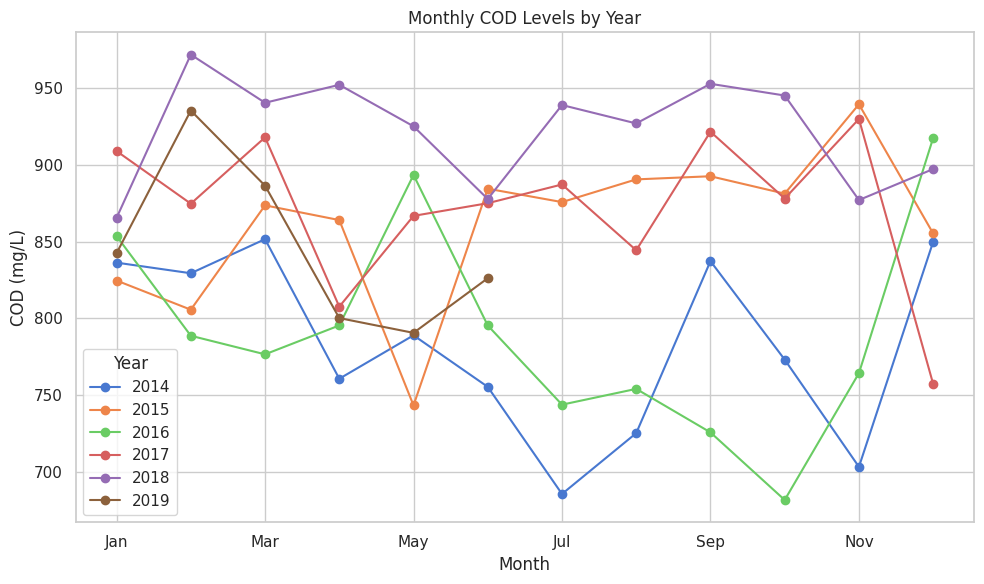

In [14]:
df['Year'] = df['date'].dt.year
pivot = df.pivot_table(index='Month_Name', columns='Year', values='Chemical Oxygen Demand')
pivot = pivot.reindex(month_order)

pivot.plot(figsize=(10, 6), marker='o')
plt.title('Monthly COD Levels by Year')
plt.ylabel('COD (mg/L)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
